In [1]:
suppressMessages ( library ( dplyr ) )
suppressMessages ( library ( ggplot2 ) )
options(dplyr.summarise.inform = FALSE)

1. Os dados a seguir correspondem a médias de uma variável quantitativa de acordo com o genótipo conjunto de dois locos de marcadores moleculares (do tipo Single Nucleotide Polimorphsms, SNP_A e SNP_B)), para 7 populações sob estudo. As ações gênicas nessas populações são denominadas como: P1: Ação gênica intermediária; P2: Dominância completa; P3: Ação gênica complementar; P4: Epistasia complexa; P5: Dominância parcial; P6: Superdominância; P7: Ação gênica duplicada.

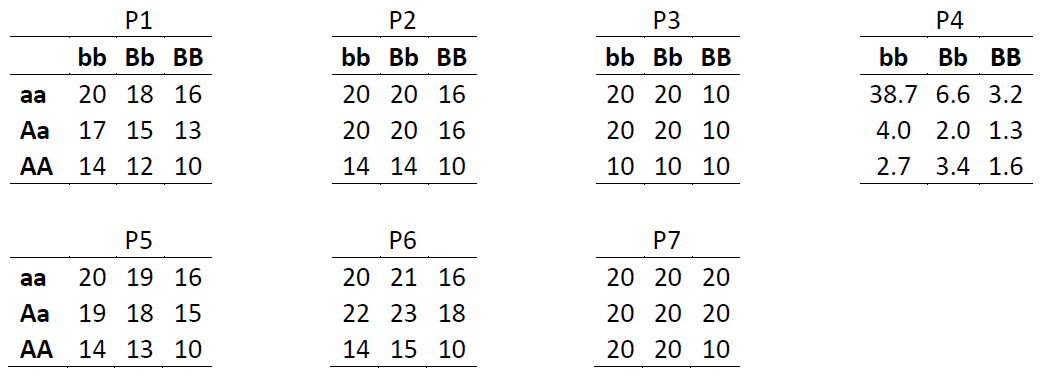


a) Para cada população (P1 a P7) construa o gráfico de perfis de médias correspondente. Com base nesse gráfico, há indicação de efeito de interação entre os dois fatores genéticos (SNP_A e SNP_B)? Comente.

In [2]:
# dados para matrizes
medias1 = t ( matrix ( c ( 20 , 18 , 16 , 17 , 15 , 13 , 14 , 12 , 10) , ncol = 3 ) )
medias2 = t ( matrix ( c ( 20 , 20 , 16 , 20 , 20 , 16 , 14 , 14 , 10) , ncol = 3 ) )
medias3 = t ( matrix ( c ( 20 , 20 , 10 , 20 , 20 , 10 , 10 , 10 , 10) , ncol = 3 ) )
medias4 = t ( matrix ( c ( 38.7 , 6.6 , 3.2 , 4 , 2 , 1.3 , 2.7 , 3.4 , 1.6) , ncol = 3 ) )
medias5 = t ( matrix ( c ( 20 , 19 , 16 , 19 , 18 , 15 , 14 , 13 , 10) , ncol = 3 ) )
medias6 = t ( matrix ( c ( 20 , 21 , 16 , 22 , 23 , 18 , 14 , 15 , 10) , ncol = 3 ) )
medias7 = t ( matrix ( c ( 20 , 20 , 20 , 20 , 20 , 20 , 20 , 20 , 10) , ncol = 3 ) )
# Checagem
medias1 

20,18,16
17,15,13
14,12,10


In [3]:
mediasTodas = c ( )

for ( i in 1:7 ){
    
    a = matrix ( get ( paste0 ( "medias" , i ) ) , nrow = 9 , ncol = 1 )
    mediasTodas = c ( mediasTodas , a )
}

df = as.data.frame ( cbind ( mediasTodas , rep ( c ( "aa" , "Aa" , "AA" ) , 9*7 ) , c (rep ("bb",3),rep("Bb",3),rep("BB",3) ) , paste0 ("P" ,sort ( rep ( seq ( 1 , 7 ) , 9 ) ) ) ) )
glimpse ( df )

Rows: 189
Columns: 4
$ mediasTodas <fct> 20, 17, 14, 18, 15, 12, 16, 13, 10, 20, 20, 14, 20, 20,...
$ V2          <fct> aa, Aa, AA, aa, Aa, AA, aa, Aa, AA, aa, Aa, AA, aa, Aa,...
$ V3          <fct> bb, bb, bb, Bb, Bb, Bb, BB, BB, BB, bb, bb, bb, Bb, Bb,...
$ V4          <fct> P1, P1, P1, P1, P1, P1, P1, P1, P1, P2, P2, P2, P2, P2,...


In [4]:
colnames ( df ) = c ( "media" , "genA" , "genB" , "pop" )
df$media = as.numeric ( as.character ( df$media ) )
head ( df , 10 ) 

,media,genA,genB,pop
,<dbl>,<fct>,<fct>,<fct>
1,20,aa,bb,P1
2,17,Aa,bb,P1
3,14,AA,bb,P1
4,18,aa,Bb,P1
5,15,Aa,Bb,P1
6,12,AA,Bb,P1
7,16,aa,BB,P1
8,13,Aa,BB,P1
9,10,AA,BB,P1


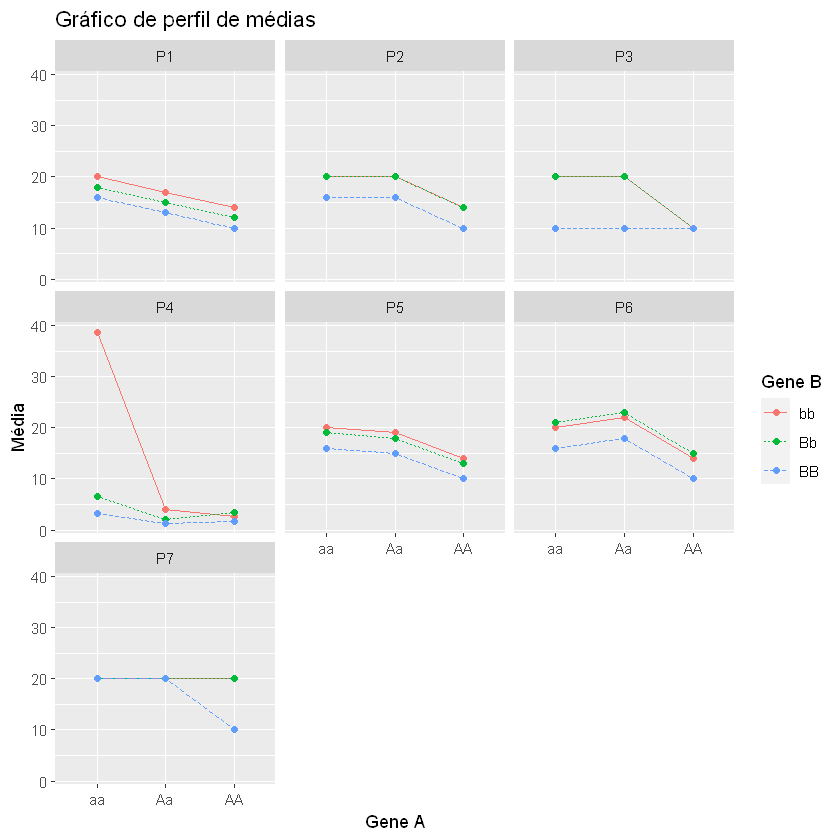

In [5]:
df %>% ggplot ( aes ( x = genA , y = media , group = genB , col = genB ) ) + 
geom_line ( aes(linetype=genB) ) + 
geom_point ( ) + 
facet_wrap ( ~pop ) +
labs ( x = "Gene A" , y = "Média" , linetype = "Gene B" , col = "Gene B" , title = "Gráfico de perfil de médias" )

Pode-se observar descritivamente que:
* Não há evidencias de interação entre os genótipos nas populações 1, 2, 5 e 6;
* Há evidencias de interação entre os genótipos nas populações 3, 4 e 7.

b) Vamos agora gerar dados de Delineamentos Completamente Aleatorizados (DCA) com esquema Fatorial 3x3 (Fator SNP_A e fator SNP_B, ambos, em 3 níveis genotípicos). Considere $\sigma^2$ =1 e, com base nas 9 médias apresentadas em P1 a P7, gere $r=25$ valores para cada um dos 9 grupos, sob o modelo de distribuição Normal. Em cada caso, obtenha a tabela de ANOVA e interprete os resultados.

In [6]:
# Gerar os dados para os cruzamentos genotípicos para todas as populações

genA = c ( "aa" , "Aa" , "AA" )
genB = c ( "bb" , "Bb" , "BB" )


n = 25
sigma = 1
set.seed ( 202010 )
# loop nas populações
for ( i in 1:7 ){
    
#   vetor no qual serão armazenados os valores dos cruzamentos genotipicos para cada população
    pop = c ( )
    
#     loop nas linhas de cada população
    for ( indiceA in 1:length ( genA ) ){
        
#   loop nas colunas de cada população
      for ( indiceB in 1:length ( genB ) ){
        
#       medias é a matriz da população i (de 1 a 7)
        medias = get ( paste0 ( "medias" , i ) )
#       geracao dos valores para a populacao i da combinacao genotipica (indiceA: 1 = aa , 2 = Aa , 3 = AA; indiceB: 1 = bb , 2 = Bb , 3 = BB)
        obs = rnorm ( n , mean = medias [ indiceA , indiceB ] , sd = 1 )
#       guardando valores no loop
        observacoesConjuntas = cbind ( obs , genA [ indiceA ] , genB [ indiceB ]  )
        pop = rbind ( pop , observacoesConjuntas )

      }
  
    }

assign ( paste0 ( "dfCruzamento" , i) , as.data.frame ( pop ) )
assign ( paste0 ( "dfCruzamento" , i) , get ( paste0 ( "dfCruzamento" , i) ) %>% rename ( "Obs" = "obs" , "genA" = "V2" , "genB" = "V3" ) )
assign ( paste0 ( "dfCruzamento" , i) , get ( paste0 ( "dfCruzamento" , i) ) %>% mutate ( Obs = as.numeric ( as.character ( Obs ) ) ) )
assign ( paste0 ( "dfCruzamento" , i) , get ( paste0 ( "dfCruzamento" , i) ) %>% mutate ( genA = as.factor ( genA ) ) )
assign ( paste0 ( "dfCruzamento" , i) , get ( paste0 ( "dfCruzamento" , i) ) %>% mutate ( genB = as.factor ( genB ) ) )
    
}



In [7]:
# função para imprimir tabelas de anova
printTabela = function ( df ){
    
    print ( anova ( aov ( df$Obs ~ df$genA * df$genB ) ) )
    print ( summary ( lm ( df$Obs ~ df$genA * df$genB ) ) )
    
}

In [8]:
for ( i in 1:7 ){
    
    print (paste ( "População" , i ) )
    printTabela ( get ( paste0 ( "dfCruzamento" , i ) ) )
    
}


[1] "População 1"
Analysis of Variance Table

Response: df$Obs
                 Df  Sum Sq Mean Sq  F value Pr(>F)    
df$genA           2 1352.97  676.48 622.3778 <2e-16 ***
df$genB           2  594.04  297.02 273.2655 <2e-16 ***
df$genA:df$genB   4    2.86    0.71   0.6572 0.6224    
Residuals       216  234.78    1.09                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Call:
lm(formula = df$Obs ~ df$genA * df$genB)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.95184 -0.66356 -0.05399  0.71769  2.63014 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          19.7308     0.2085  94.626  < 2e-16 ***
df$genAAa            -2.7738     0.2949  -9.406  < 2e-16 ***
df$genAAA            -5.7016     0.2949 -19.335  < 2e-16 ***
df$genBBb            -2.0140     0.2949  -6.830 8.51e-11 ***
df$genBBB            -3.6103     0.2949 -12.243  < 2e-16 ***
df$genAAa:df$genBBb  -0.1111     0.4170  -0.266    0.790 

Assim como havíamos deduzido a partir dos gráficos, temos que nas populações 3, 4 e 7 há evidencias para se rejeitar a hipótese de que não há interação entre os genótipos, enquanto que nas demais não.

2. Considere os dados do arquivo “map.txt” que traz informações de 13 variáveis fenotípicas ("SEX", "Peso", "Altura", "CIRCABD", "GLICOSE", "CTOTAL", "TRIG", "Idade", "mediaPAS", "mediaPAD", "MedPres", "MedCol", "MedDb"), além do genótipo de 102 SNPs ("rs12628452_A" "rs7289830_T", etc.) para uma amostra de 1675 indivíduos.

a) Seguindo o princípio da Aleatorização Mendeliana (Burgess and Thompson, 2015), suponha que o nível genotípico (aa=0, Aa=1, AA=2) de cada SNP foi aleatoriamente atribuído a cada indivíduo. Assim, escolha uma das variáveis quantitativas do banco de dados, e avalie o efeito de cada SNP sobre essa variável por meio de um modelo de ANOVA. Adote um esquema DCA com 1 fator em 3 níveis. Caso seja necessário, proponha uma transformação da variável para atender às premissas clássicas.

In [9]:
base2 = read.table ( "map.txt" , header = T , stringsAsFactors = F )
head ( base2 )

,SEX,Peso,Altura,CIRCABD,GLICOSE,CTOTAL,TRIG,Idade,mediaPAS,mediaPAD,...,rs16981741_G,rs175148_A,rs165650_C,rs165652_T,rs165757_G,rs17435801_G,rs175152_A,rs165645_T,rs5746906_G,rs165670_A
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,82600,178,101,85.1,184.0,234.7,62,135.67,94.67,...,1,1,1,1,1,1,1,0,0,0
2,2,73000,170,96,130.5,223.8,147.7,59,144.67,71.00,...,0,1,1,1,1,0,1,0,0,0
3,2,66400,156,80,86.9,216.6,219.0,45,136.67,84.67,...,0,0,1,1,1,0,1,1,0,1
4,2,94200,188,98,74.1,216.0,219.2,34,119.00,73.00,...,0,1,0,0,0,0,0,2,1,2
5,2,75200,183,87,116.1,174.1,128.1,28,107.00,77.00,...,1,0,1,1,1,0,1,1,0,2
6,2,87600,163,101,109.1,221.5,131.8,43,120.33,89.67,...,0,1,0,NA,0,0,0,2,1,2


In [10]:
base2$Peso = base2$Peso/1000
head(base2)

,SEX,Peso,Altura,CIRCABD,GLICOSE,CTOTAL,TRIG,Idade,mediaPAS,mediaPAD,...,rs16981741_G,rs175148_A,rs165650_C,rs165652_T,rs165757_G,rs17435801_G,rs175152_A,rs165645_T,rs5746906_G,rs165670_A
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,82.6,178,101,85.1,184.0,234.7,62,135.67,94.67,...,1,1,1,1,1,1,1,0,0,0
2,2,73.0,170,96,130.5,223.8,147.7,59,144.67,71.00,...,0,1,1,1,1,0,1,0,0,0
3,2,66.4,156,80,86.9,216.6,219.0,45,136.67,84.67,...,0,0,1,1,1,0,1,1,0,1
4,2,94.2,188,98,74.1,216.0,219.2,34,119.00,73.00,...,0,1,0,0,0,0,0,2,1,2
5,2,75.2,183,87,116.1,174.1,128.1,28,107.00,77.00,...,1,0,1,1,1,0,1,1,0,2
6,2,87.6,163,101,109.1,221.5,131.8,43,120.33,89.67,...,0,1,0,NA,0,0,0,2,1,2


In [11]:
fenotipos = c("SEX", "Peso", "Altura", "CIRCABD", "GLICOSE", "CTOTAL", "TRIG", "Idade", "mediaPAS", "mediaPAD", "MedPres", "MedCol", "MedDb")
snps = setdiff ( colnames ( base2 ) , fenotipos )
infosRelevantes = c ( )

for ( coluna in snps ){
  
    baseAux = base2 [ (!is.na ( base2 [ , coluna ] ))&(!is.na(base2$Peso)) , ]
    if ( nrow ( baseAux [ baseAux[ , coluna ] == 2 , ] ) == 1 ){
        
        baseAux = baseAux [ baseAux [ , coluna ] < 2 , ]
        
    }
#     print ( nrow ( baseAux ) )
    baseAux[ , coluna ] = as.factor ( baseAux[ , coluna ] )
#     print ( nrow ( baseAux ) )
    modelo = lm ( baseAux$Peso ~ baseAux[,coluna] )
#     print ( length ( modelo$residuals ) )
    obj = anova ( modelo )
    transf = "N"
    shapiroTest = shapiro.test ( modelo$residuals )
    bart = bartlett.test ( modelo$residuals ~ baseAux[ , coluna ] )
    ind = snpar::runs.test( modelo$residuals )
    
    if ( shapiroTest$p.value < 0.01 ){
        
        box = EnvStats::boxcox( lm ( baseAux$Peso ~ baseAux[,coluna] ) , objective.name = "Shapiro-Wilk" , optimize=T , lambda = c ( -2,2 ))
        modelo = lm ( ((baseAux$Peso^box$lambda)-1)/box$lambda ~ baseAux[,coluna] )
        transf = "S"
        shapiroTest = shapiro.test ( modelo$residuals )
        bart = bartlett.test ( modelo$residuals ~ baseAux[ , coluna ] )
        ind = snpar::runs.test( modelo$residuals )
        
    }
        
        
    
    infosRelevantes = rbind ( infosRelevantes , c ( coluna , obj$Df[1] , obj$`Pr(>F)`[1] , nrow ( baseAux ) , shapiroTest$p.value , bart$p.value , ind$p.value , transf ) )
  
}


In [12]:
resultados = infosRelevantes %>% as.data.frame ()
glimpse ( resultados )

Rows: 102
Columns: 8
$ V1 <fct> rs12628452_A, rs7289830_T, rs5746356_A, rs10154759_C, rs7354790_...
$ V2 <fct> 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2...
$ V3 <fct> 0.643563349946583, 0.776267007661512, 0.9021059997094, 0.5928297...
$ V4 <fct> 828, 819, 819, 827, 763, 819, 805, 825, 814, 809, 828, 771, 827,...
$ V5 <fct> 0.0244171310959916, 0.022179794800643, 0.0249360885744693, 0.023...
$ V6 <fct> 0.233184802147091, 0.390675997587133, 0.384480277895809, 0.65383...
$ V7 <fct> 0.000843080026010348, 0.000898060830733, 0.000183409104758606, 0...
$ V8 <fct> S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S...


In [13]:
colnames ( resultados ) = c ( "snp" , "gl" , "valP" , "n" , "normalidade" , "homocedasticidade" , "indep" , "transf" )

resultados$gl = as.numeric( as.character ( resultados$gl ) )
resultados$valP = as.numeric( as.character ( resultados$valP ) )
resultados$n = as.numeric( as.character ( resultados$n ) )
resultados$normalidade = as.numeric( as.character ( resultados$normalidade ) )
resultados$homocedasticidade = as.numeric( as.character ( resultados$homocedasticidade ) )
resultados$indep = as.numeric( as.character ( resultados$indep ) )

glimpse ( resultados )

Rows: 102
Columns: 8
$ snp               <fct> rs12628452_A, rs7289830_T, rs5746356_A, rs1015475...
$ gl                <dbl> 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2...
$ valP              <dbl> 0.6435633499, 0.7762670077, 0.9021059997, 0.59282...
$ n                 <dbl> 828, 819, 819, 827, 763, 819, 805, 825, 814, 809,...
$ normalidade       <dbl> 0.024417131, 0.022179795, 0.024936089, 0.02333637...
$ homocedasticidade <dbl> 0.233184802, 0.390675998, 0.384480278, 0.65383731...
$ indep             <dbl> 0.0008430800, 0.0008980608, 0.0001834091, 0.00057...
$ transf            <fct> S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, S...


In [14]:
sig = 0.01
nrow ( resultados[resultados$indep > sig , ] )

[1] 0

Como pode-se observar, nenhum dos modelos apresenta a premissa da independencia (considerando o nível de significancia de 1%). 

In [15]:
print ( paste ( "Existem" , nrow ( resultados [resultados$normalidade > sig & resultados$homocedasticidade > sig , ] ) , "modelos que atendem simultaneamente as premissas de normalidade e homocedasticidade." ) )
print ( "Dos quais apenas os modelos com os snps abaixo possuem efeito sobre a resposta (considerando nível de significancia a 5%) " )
resultados [ resultados$normalidade > sig & resultados$homocedasticidade > sig & resultados$valP < 0.05 , ]

[1] "Existem 98 modelos que atendem simultaneamente as premissas de normalidade e homocedasticidade."
[1] "Dos quais apenas os modelos com os snps abaixo possuem efeito sobre a resposta (considerando nível de significancia a 5%) "


,snp,gl,valP,n,normalidade,homocedasticidade,indep,transf
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,rs1041770_A,2,0.0002019449,805,0.02788257,0.1619183,1.611281e-04,S
13,rs2027649_G,2,0.0353292303,827,0.01260647,0.4156612,2.471733e-03,S
32,rs5746647_G,2,0.0253555530,827,0.02854637,0.5682856,3.386390e-04,S
41,rs5993646_T,2,0.0106742830,827,0.04149835,0.5594899,6.298785e-05,S
46,rs5993848_G,2,0.0083249671,822,0.04347416,0.5553282,2.165900e-04,S


b) Apresente os valores-p da estatística F do teste global da ANOVA em um “gráfico
Manhattan” (gráfico de dispersão: -log10(valor-p) x índice do SNP). Interprete os
resultados. Discuta sobre possíveis correções para os múltiplos (102) testes realizados
simultaneamente.

### Primeira das versões

In [16]:
# Atribuído cromossomo "aleatório" para os snps
resultados$Chr = 1

# ordenação por nome
resultados = resultados %>% mutate ( tam = nchar ( as.character ( resultados$snp ) ) ) %>% arrange ( tam , snp ) %>% mutate ( Ord = 1:nrow ( resultados ) )
resultados  %>% head ( 4 )

,snp,gl,valP,n,normalidade,homocedasticidade,indep,transf,Chr,tam,Ord
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>
1,rs131560_C,2,0.5617513,819,0.02330934,0.08707556,0.0008961202,S,1,10,1
2,rs140378_G,2,0.7610426,824,0.01322698,0.08807795,0.0008188235,S,1,10,2
3,rs165645_T,2,0.4888287,825,0.01273311,0.75480657,0.0002543754,S,1,10,3
4,rs165650_C,2,0.7502567,828,0.01680965,0.27701049,0.0003002141,S,1,10,4


In [17]:
# Ordenação do valor-P para calcular a significância por FDR e pelo método de Holm
correcoes = resultados %>% select ( snp , valP ) %>% arrange ( valP )
correcoes %>% head ( 5 )

,snp,valP
,<fct>,<dbl>
1,rs1041770_A,0.0002019449
2,rs5993848_G,0.0083249671
3,rs5993646_T,0.0106742830
4,rs5746647_G,0.0253555530
5,rs2027649_G,0.0353292303


In [18]:
# Cálculo da significância por FDR e pelo método de Holm

encontraSignif = function ( df , coluna ){
    
    holm = 0

    for ( indice in 1 : nrow ( df ) ){

        if ( holm == 0 ){
            
                if ( df [ indice , coluna ] < .05/( nrow ( df ) - indice + 1 ) ) {

            df [ indice , "Holm" ] = "S"

                } else {

                    df [ indice:nrow ( df ) , "Holm" ] = "N"
                    holm = 1

        }

        }

        if ( df [ nrow (df) - indice + 1 , coluna ] < .05*(nrow (df) - indice + 1)/nrow ( df ) ){

            df [ nrow (df) - indice + 1 , "FDR" ] = "S"

        } else {

            df [ nrow (df) - indice + 1 , "FDR" ] = "N"

        }

    }
    
    return ( df )
}

correcoes = encontraSignif ( correcoes , "valP" )
correcoes %>% head ( 5 )

,snp,valP,Holm,FDR
,<fct>,<dbl>,<chr>,<chr>
1,rs1041770_A,0.0002019449,S,S
2,rs5993848_G,0.0083249671,N,N
3,rs5993646_T,0.0106742830,N,N
4,rs5746647_G,0.0253555530,N,N
5,rs2027649_G,0.0353292303,N,N


In [19]:
table ( correcoes$FDR , correcoes$Holm )
# Apenas um SNP teve o efeito significante e em ambas as correções

   
      N   S
  N 101   0
  S   0   1

In [20]:
mergeDfs = merge ( resultados , correcoes , by = c ( "snp" , "valP" ) )
head ( mergeDfs )

,snp,valP,gl,n,normalidade,homocedasticidade,indep,transf,Chr,tam,Ord,Holm,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>
1,rs10154759_C,0.5928297251,1,827,0.02333637,0.6538373,0.0005756431,S,1,12,91,N,N
2,rs1041770_A,0.0002019449,2,805,0.02788257,0.1619183,0.0001611281,S,1,11,14,S,S
3,rs11089179_G,0.6754774801,2,821,0.02438408,0.2604085,0.0001409980,S,1,12,92,N,N
4,rs11089263_C,0.3404403947,2,819,0.01759294,0.2721687,0.0014656446,S,1,12,93,N,N
5,rs11089264_G,0.4216021787,2,808,0.01459598,0.2097183,0.0031070624,S,1,12,94,N,N
6,rs12628452_A,0.6435633499,1,828,0.02441713,0.2331848,0.0008430800,S,1,12,95,N,N


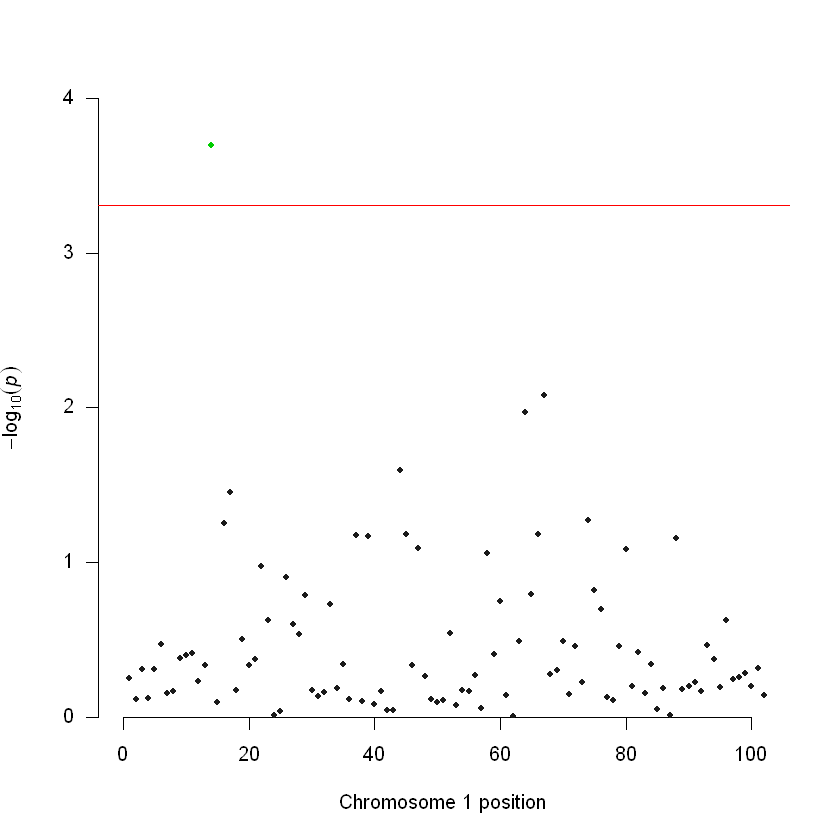

In [21]:
# Correção de Bonferroni
bF = .05/nrow ( mergeDfs )
# Snps identificados por Holm e FDR
qqman::manhattan ( mergeDfs , chr = "Chr" , bp = "Ord" , p = "valP" , snp = "snp" , genomewideline =  -log10(bF) , highlight = mergeDfs[ ( mergeDfs$Holm == "S" ) & ( mergeDfs$FDR == "S" ) , "snp"])

# Conclusão

Por todos os critérios, o snp rs1041770_A foi o único que, considerando nível de significância a 5%, teve evidências de ter efeito sobre a variável resposta peso. Algumas considerações importantes:

* O critério de Bonferroni é o mais simples e aplicável dos métodos. Pode ser utilizado para testes (ou intervalos) que não necessariamente precisam ser independentes, ou do mesmo tipo, ou relacionados de alguma forma;
* O método de Holm é uma modificação do método de Bonferroni, mais poderoso no sentido de comparar apenas o menor valor-P com $\frac{\alpha}{k}$ (neste caso, deveríamos encontrar a mesma quantidade ou mais snp's significantes do que no método anterior). Porém não pode ser utilizado para se realizar intervalos de confiança;
* O método FDR controla a taxa de descobertas falsas (i.e., a quantidade esperada de rejeições de $H_0$ falsas em relação a todas as rejeições de $H_0$), além de ser menos conservador. Também existe o ponto de que este método é adequado apenas a testes estatisticamente independentes.

c) Para cada SNP, teste seu efeito aditivo, $H_0: \mu_{AA} - \mu_{aa} = 0$. Apresente os resultados desses testes por meio de um “gráfico vulcão” (gráfico de dispersão: -log10(valor-p) x estimativa do contraste ( $\mu_{AA} - \mu_{aa}$ ) ). Interprete os resultados

In [22]:
infosRelevantesContraste = c ( )

for ( coluna in snps ){
  
    baseAux = base2 [ (!is.na ( base2 [ , coluna ] ))&(!is.na(base2$Peso)) , ]
    if ( nrow ( baseAux [ baseAux[ , coluna ] == 2 , ] ) <= 1 ){
        
        print ( paste ( "O snp" , coluna , "não será utilizado pois não possui homozigotos AA" ) )
        
    } else{
                
        baseAux[baseAux[,coluna] == 0 , "x1" ] = -1
        baseAux[baseAux[,coluna] == 1 , "x1" ] = 0
        baseAux[baseAux[,coluna] == 2 , "x1" ] = 1

        baseAux[baseAux[,coluna] == 0 , "x2" ] = 0
        baseAux[baseAux[,coluna] == 1 , "x2" ] = 1
        baseAux[baseAux[,coluna] == 2 , "x2" ] = 0


        modelo = lm ( baseAux$Peso ~ baseAux$x1 + baseAux$x2 )
        
#         Aditividade
        coefC = modelo$coefficients[2][[1]]
#         Dominancia
        coefD = modelo$coefficients[3][[1]]
        
        sumMod = summary ( modelo )
        
#         Aditividade
        valPC = sumMod$coefficients[2,4]
#         Dominancia
        valPD = sumMod$coefficients[3,4]
    
    infosRelevantesContraste = rbind ( infosRelevantesContraste , c ( coluna , coefC , valPC , coefD , valPD , nrow ( baseAux ) ) )

        
    }

  
}


[1] "O snp rs12628452_A não será utilizado pois não possui homozigotos AA"
[1] "O snp rs10154759_C não será utilizado pois não possui homozigotos AA"
[1] "O snp rs9712893_G não será utilizado pois não possui homozigotos AA"
[1] "O snp rs6010318_A não será utilizado pois não possui homozigotos AA"
[1] "O snp rs6010418_A não será utilizado pois não possui homozigotos AA"
[1] "O snp rs5994019_G não será utilizado pois não possui homozigotos AA"
[1] "O snp rs2379981_G não será utilizado pois não possui homozigotos AA"
[1] "O snp rs9604967_T não será utilizado pois não possui homozigotos AA"
[1] "O snp rs2845362_G não será utilizado pois não possui homozigotos AA"
[1] "O snp rs2215075_A não será utilizado pois não possui homozigotos AA"
[1] "O snp rs5994011_T não será utilizado pois não possui homozigotos AA"
[1] "O snp rs5994015_A não será utilizado pois não possui homozigotos AA"
[1] "O snp rs16981694_T não será utilizado pois não possui homozigotos AA"
[1] "O snp rs6518619_G não será uti

In [23]:
resultadosContraste = infosRelevantesContraste %>% as.data.frame ()
colnames ( resultadosContraste ) = c ( "snp" , "difMediasC" , "valPC" , "difMediasD" , "valPD" , "n" )

resultadosContraste$difMediasC = as.numeric( as.character ( resultadosContraste$difMediasC ) )
resultadosContraste$valPC = as.numeric( as.character ( resultadosContraste$valPC ) )

resultadosContraste$difMediasD = as.numeric( as.character ( resultadosContraste$difMediasD ) )
resultadosContraste$valPD = as.numeric( as.character ( resultadosContraste$valPD ) )

resultadosContraste$n = as.numeric( as.character ( resultadosContraste$n ) )

head ( resultadosContraste )

,snp,difMediasC,valPC,difMediasD,valPD,n
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs7289830_T,-0.05728155,0.970076156,-0.7292596,0.68704224,819
2,rs5746356_A,-0.59726350,0.657907230,0.4402666,0.79152490,819
3,rs7354790_T,0.97871391,0.146788464,-0.1091313,0.91064458,763
4,rs6423472_C,1.30974912,0.051111226,-1.6019480,0.08486209,819
5,rs1041770_A,7.61377858,0.004524599,-4.4411874,0.11320510,805
6,rs7285246_T,-1.91964702,0.178526968,0.5719033,0.73009282,809


In [24]:
resultadosContrasteC = resultadosContraste %>% mutate ( logEscalaC = -log10(valPC) ) %>% arrange ( -logEscalaC )
resultadosContrasteC %>% head(10)

,snp,difMediasC,valPC,difMediasD,valPD,n,logEscalaC
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs1041770_A,7.6137786,0.004524599,-4.4411874,0.113205100,805,2.3444199
2,rs5993848_G,-2.3829912,0.011073985,3.5646127,0.003127060,822,1.9556961
3,rs5993646_T,-2.2146691,0.012711140,3.3053181,0.004676991,827,1.8958155
4,rs5748651_A,7.5372340,0.047109569,-8.8593295,0.027718321,805,1.3268909
5,rs6423472_C,1.3097491,0.051111226,-1.6019480,0.084862090,819,1.2914837
6,rs5993792_G,-1.9663316,0.061022981,2.9527666,0.021968789,819,1.2145066
7,rs4535153_C,7.5403509,0.105406159,-10.0043550,0.040065689,828,0.9771340
8,rs4010560_C,7.3127119,0.114960058,-10.5852473,0.034462382,818,0.9394530
9,rs5748617_T,-0.9913878,0.133583440,0.7584223,0.419690432,827,0.8742474


In [25]:
CorrecoesContrastesC = encontraSignif ( resultadosContrasteC , "valPC" )
CorrecoesContrastesC %>% head ( 10 )

,snp,difMediasC,valPC,difMediasD,valPD,n,logEscalaC,Holm,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs1041770_A,7.6137786,0.004524599,-4.4411874,0.113205100,805,2.3444199,N,N
2,rs5993848_G,-2.3829912,0.011073985,3.5646127,0.003127060,822,1.9556961,N,N
3,rs5993646_T,-2.2146691,0.012711140,3.3053181,0.004676991,827,1.8958155,N,N
4,rs5748651_A,7.5372340,0.047109569,-8.8593295,0.027718321,805,1.3268909,N,N
5,rs6423472_C,1.3097491,0.051111226,-1.6019480,0.084862090,819,1.2914837,N,N
6,rs5993792_G,-1.9663316,0.061022981,2.9527666,0.021968789,819,1.2145066,N,N
7,rs4535153_C,7.5403509,0.105406159,-10.0043550,0.040065689,828,0.9771340,N,N
8,rs4010560_C,7.3127119,0.114960058,-10.5852473,0.034462382,818,0.9394530,N,N
9,rs5748617_T,-0.9913878,0.133583440,0.7584223,0.419690432,827,0.8742474,N,N


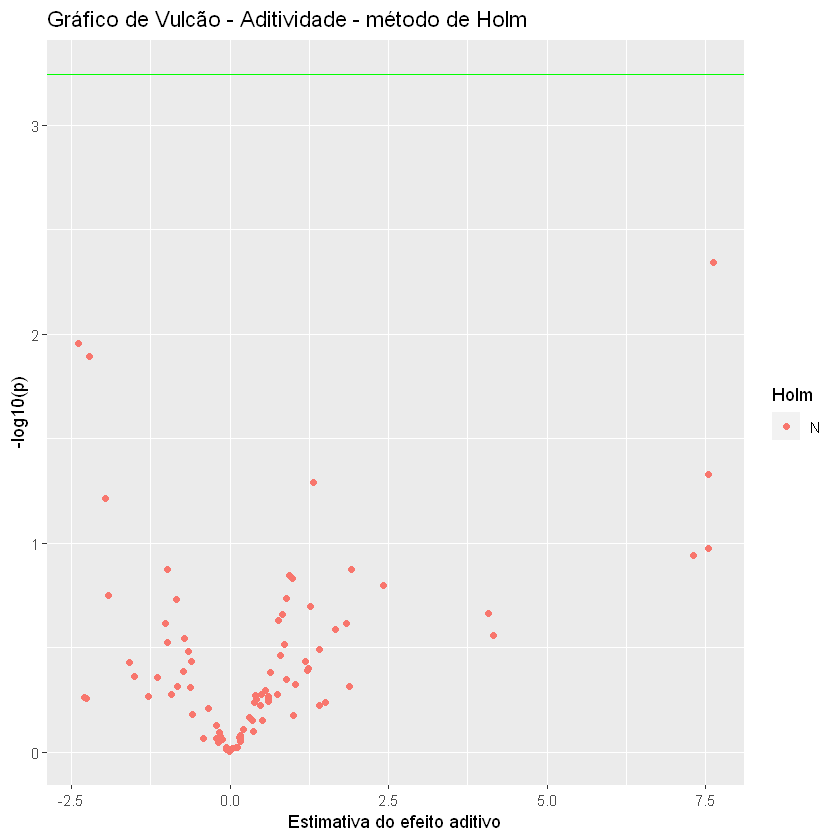

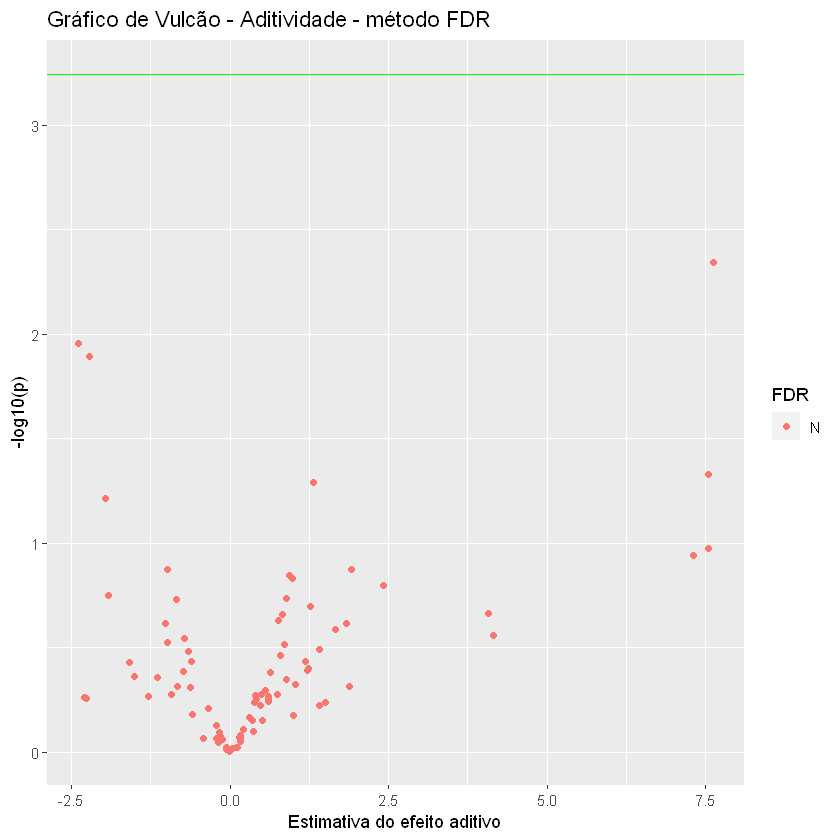

In [26]:
bfContrastesC = -log10 ( 0.05/ nrow ( CorrecoesContrastesC ) )
CorrecoesContrastesC %>% ggplot ( aes ( x = difMediasC , y = logEscalaC , colour = Holm ) ) + 
geom_point () + 
geom_hline ( yintercept = bfContrastesC , col = "green" ) +
labs ( x = "Estimativa do efeito aditivo" , y = "-log10(p)" , title = "Gráfico de Vulcão - Aditividade - método de Holm" )

CorrecoesContrastesC %>% ggplot ( aes ( x = difMediasC , y = logEscalaC , colour = FDR ) ) + 
geom_point () + 
geom_hline ( yintercept = bfContrastesC , col = "green" ) +
labs ( x = "Estimativa do efeito aditivo" , y = "-log10(p)" , title = "Gráfico de Vulcão - Aditividade - método FDR" )


# Conclusão

Pelos métodos de Bonferroni,Holm e FDR não encontramos evidências de efeito aditivo para nenhum dos snps considerando a variável peso como resposta.

d) Agora, para cada SNP, teste seu efeito de dominância, $H_0: \mu_{Aa} - \frac{(\mu_{AA} - \mu_{aa})}{2} = 0$. Apresente os resultados desses testes por meio de um “gráfico vulcão” (gráfico de dispersão: -log10(valor-p) x estimativa do contraste $H_0: \mu_{Aa} - \frac{(\mu_{AA} - \mu_{aa})}{2} = 0$. Interprete os resultados.

In [27]:
resultadosContrasteD = resultadosContraste %>% mutate ( logEscalaD = -log10(valPD) ) %>% arrange ( -logEscalaD )
resultadosContrasteD %>% head(10)

,snp,difMediasC,valPC,difMediasD,valPD,n,logEscalaD
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs5993848_G,-2.38299120,0.01107398,3.564613,0.003127060,822,2.504864
2,rs5993646_T,-2.21466908,0.01271114,3.305318,0.004676991,827,2.330033
3,rs5993792_G,-1.96633158,0.06102298,2.952767,0.021968789,819,1.658194
4,rs5748651_A,7.53723404,0.04710957,-8.859330,0.027718321,805,1.557233
5,rs1987558_T,1.40786713,0.32386559,-3.682292,0.031578545,814,1.500608
6,rs4010560_C,7.31271186,0.11496006,-10.585247,0.034462382,818,1.462655
7,rs4535153_C,7.54035088,0.10540616,-10.004355,0.040065689,828,1.397227
8,rs5993671_G,1.90974609,0.13428255,-2.936472,0.055805019,823,1.253327
9,rs8138488_G,-0.01866637,0.98184843,-2.069194,0.057381085,828,1.241231


In [28]:
CorrecoesContrastesD = encontraSignif ( resultadosContrasteD , "valPD" )
CorrecoesContrastesD %>% head ( 10 )

,snp,difMediasC,valPC,difMediasD,valPD,n,logEscalaD,Holm,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs5993848_G,-2.38299120,0.01107398,3.564613,0.003127060,822,2.504864,N,N
2,rs5993646_T,-2.21466908,0.01271114,3.305318,0.004676991,827,2.330033,N,N
3,rs5993792_G,-1.96633158,0.06102298,2.952767,0.021968789,819,1.658194,N,N
4,rs5748651_A,7.53723404,0.04710957,-8.859330,0.027718321,805,1.557233,N,N
5,rs1987558_T,1.40786713,0.32386559,-3.682292,0.031578545,814,1.500608,N,N
6,rs4010560_C,7.31271186,0.11496006,-10.585247,0.034462382,818,1.462655,N,N
7,rs4535153_C,7.54035088,0.10540616,-10.004355,0.040065689,828,1.397227,N,N
8,rs5993671_G,1.90974609,0.13428255,-2.936472,0.055805019,823,1.253327,N,N
9,rs8138488_G,-0.01866637,0.98184843,-2.069194,0.057381085,828,1.241231,N,N


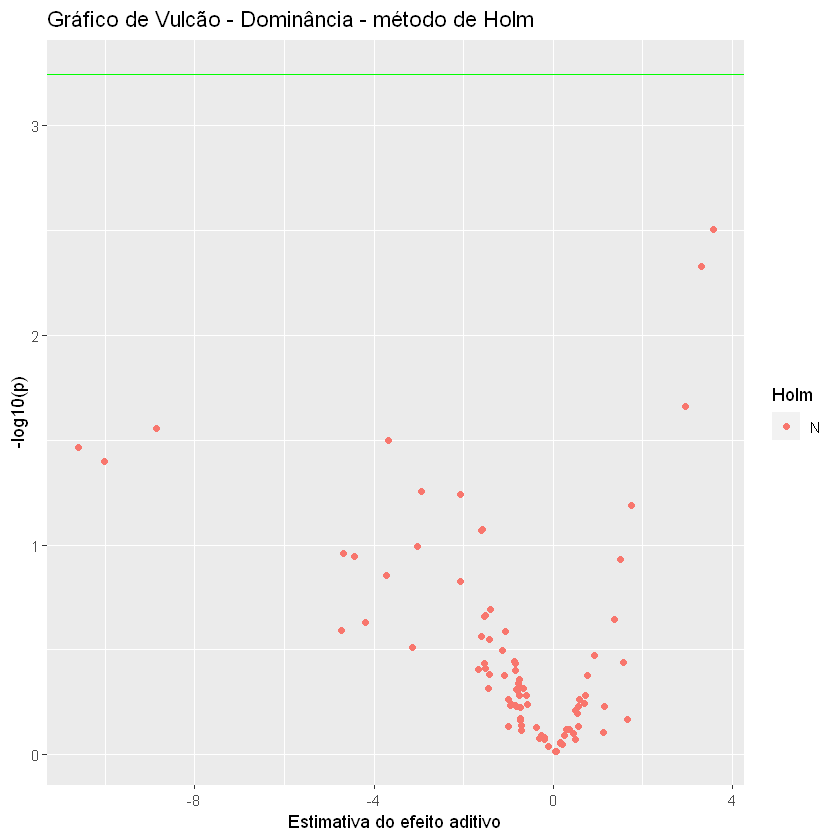

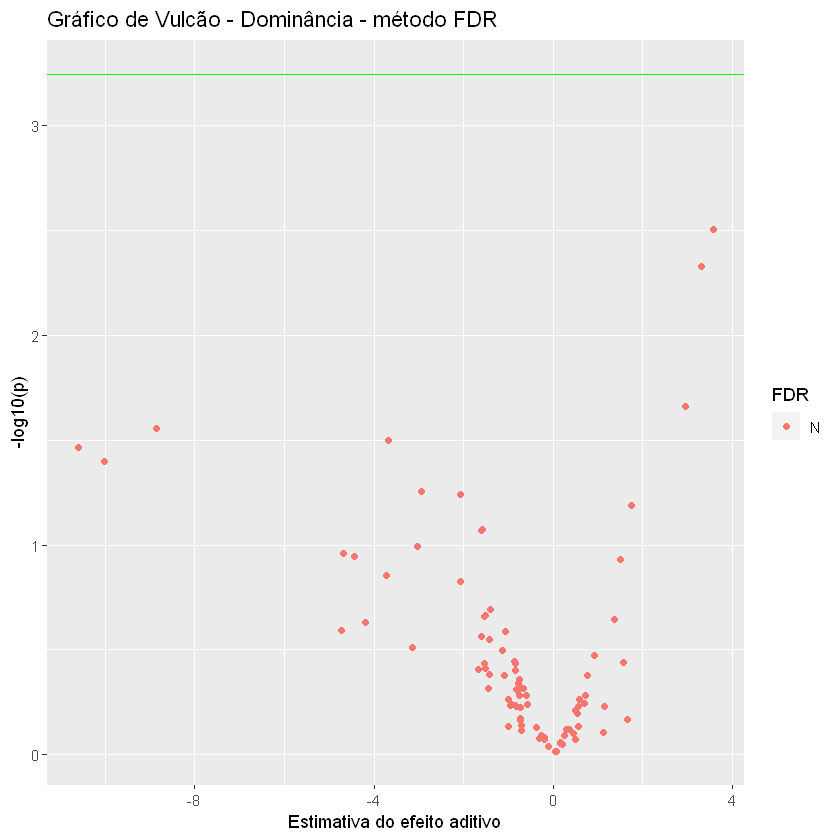

In [29]:
bfContrastesD = -log10 ( 0.05/ nrow ( CorrecoesContrastesD ) )
CorrecoesContrastesD %>% ggplot ( aes ( x = difMediasD , y = logEscalaD , colour = Holm ) ) + 
geom_point () + 
geom_hline ( yintercept = bfContrastesD , col = "green" ) +
labs ( x = "Estimativa do efeito aditivo" , y = "-log10(p)" , title = "Gráfico de Vulcão - Dominância - método de Holm" )

CorrecoesContrastesD %>% ggplot ( aes ( x = difMediasD , y = logEscalaD , colour = FDR ) ) + 
geom_point () + 
geom_hline ( yintercept = bfContrastesD , col = "green" ) +
labs ( x = "Estimativa do efeito aditivo" , y = "-log10(p)" , title = "Gráfico de Vulcão - Dominância - método FDR" )


# Conclusão

Pelos métodos de Bonferroni e Holm, não encontramos evidências de efeito aditivo para nenhum dos snps considerando a variável peso como resposta.

e) Hipoteticamente, assuma que há interesse, e é apropriado, realizar uma meta-análise dos resultados de significância do efeito aditivo desses 102 marcadores. Use as fórmulas apresentadas a seguir para combinar os resultados e obter um valor-p global.
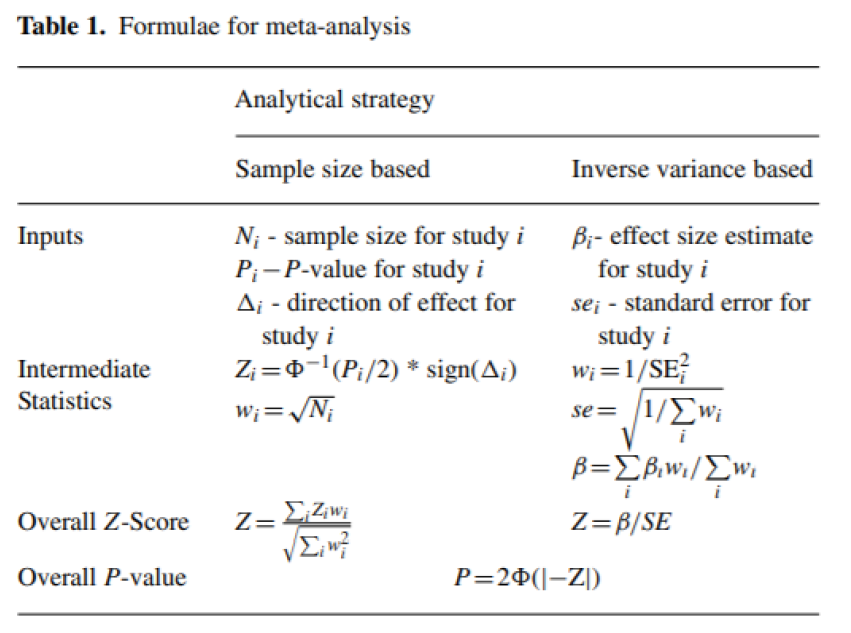

**Obs:** A fórmula correta é $P = 2\phi(-|Z|)$ - é mais coerente com o que é dito no artigo.

In [30]:
infosNecessarias = CorrecoesContrastesC %>% select ( snp , difMediasC , valPC , n ) %>% mutate ( w = sqrt ( n ) , z = qnorm ( valPC/2 ) , sentido = sign ( difMediasC ) ) %>% mutate ( bigZNum = z*sentido*w )
head( infosNecessarias )

,snp,difMediasC,valPC,n,w,z,sentido,bigZNum
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs1041770_A,7.613779,0.004524599,805,28.37252,-2.839065,1,-80.55142
2,rs5993848_G,-2.382991,0.011073985,822,28.67054,-2.540355,-1,72.83337
3,rs5993646_T,-2.214669,0.012711140,827,28.75761,-2.491761,-1,71.65710
4,rs5748651_A,7.537234,0.047109569,805,28.37252,-1.985314,1,-56.32836
5,rs6423472_C,1.309749,0.051111226,819,28.61818,-1.950545,1,-55.82103
6,rs5993792_G,-1.966332,0.061022981,819,28.61818,-1.873329,-1,53.61126


In [31]:
pnorm ( sum(infosNecessarias$bigZNum)/sum(infosNecessarias$w^2) )

[1] 0.4970434

In [32]:
2 * pnorm ( - abs ( sum(infosNecessarias$bigZNum)/sum(infosNecessarias$w^2) ) )
print ( paste ( "Z-score:" , sum(infosNecessarias$bigZNum)/sum(infosNecessarias$w^2)))

[1] 0.9940869

[1] "Z-score: -0.00741105254208443"


Baseado no valor calculado, conclui-se com o valor-p global obtido que não há significância de efeito aditivo para a variável peso.

f) Ainda, considerando o banco de dados “map.txt”, escolha um dentre os 102 SNPs e avalie o possível efeito de interação do SNP e do sexo do indivíduo sobre a variável que está sendo analisada. Para tanto, ajuste um modelo ANOVA para um esquema DCA Fatorial 3x2.

Tomando o SNP rs5993848_G para avaliar o possível efeito de interação com a variável sexo, temos que:

In [33]:
snpEscolhido = "rs5993848_G"
dfMod = base2 [ (!is.na ( base2 [ , snpEscolhido ] ))&(!is.na(base2$Peso)) , c ( "SEX" , "Peso" , snpEscolhido ) ]
head ( dfMod )

,SEX,Peso,rs5993848_G
,<int>,<dbl>,<int>
1,1,82.6,0
2,2,73.0,1
3,2,66.4,0
4,2,94.2,0
5,2,75.2,0
6,2,87.6,1


In [34]:
dfMod$rs5993848_G = as.factor ( dfMod$rs5993848_G )
dfMod$SEX = as.factor ( dfMod$SEX )

anovaMod = aov ( Peso ~ SEX*rs5993848_G , data = dfMod)
anova(anovaMod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
SEX,1,6435.10937,6435.10937,39.069780,6.584656e-10
rs5993848_G,2,1906.66630,953.33315,5.788016,3.191242e-03
SEX:rs5993848_G,2,51.19556,25.59778,0.155413,8.560869e-01
Residuals,816,134401.81180,164.70810,NA,NA


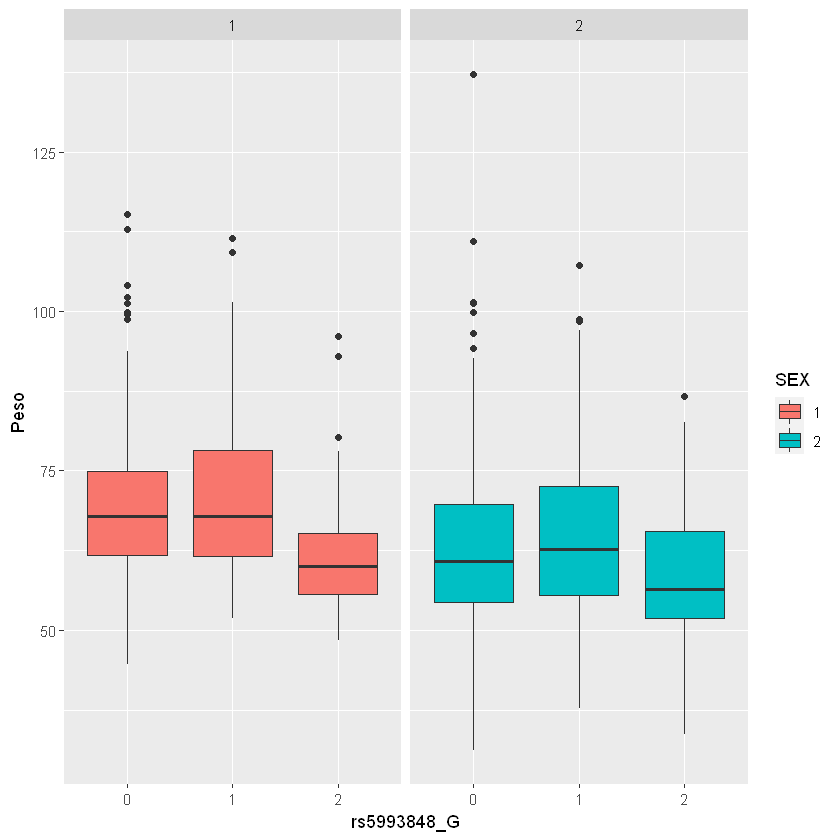

In [35]:
dfMod %>% ggplot ( ) + geom_boxplot ( aes ( y = Peso , x = rs5993848_G , fill = SEX ) ) + facet_wrap(~SEX)

A partir da tabela de ANOVA conclui-se que, apesar de não podermos rejeitar a hipótese de que a interação é nula, temos que tanto o efeito de SNP quanto o efeito de sexo existem sobre a variável resposta peso.

3. Os dados a seguir se referem à contagem diferencial de um tipo de pulgão que ocorre em plantas, antes e depois de um tratamento por 10 dias. Três tratamentos, com água (T1), esporos (T2) e com óleo natural (T3) foram usados em 5 plantas para avaliar o controle da infestação pelo pulgão. No experimento, três folhas contaminadas foram selecionadas de cada uma das plantas, e os tratamentos foram então aleatoriamente atribuídos às folhas. A contagem de pulgões em quadrantes definidos nas folhas foi feita antes e depois do tratamento e a diferença registrada. Os dados estão indicados a seguir.
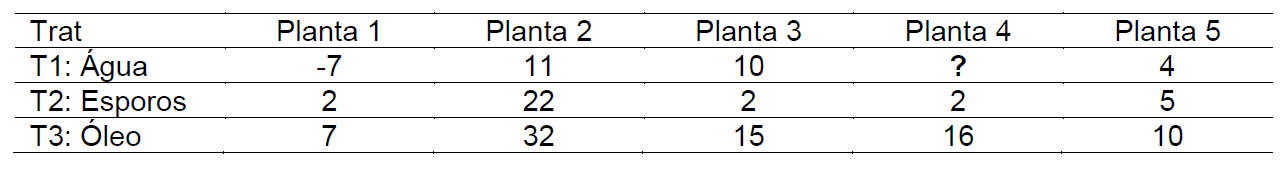

a) Complete a casela faltante (indicada como ?) e realize uma análise de variância destes dados. Que suposições foram adotadas na análise? Essas estão satisfeitas?

In [36]:
# Uma possibilidade
col1 = c ( -7 , 2 , 7 , 11 , 22 , 32 , 10 , 2 , 15 , NA , 2 , 16 , 4 , 5 , 10 )
col2 = rep ( c ( "Agua" , "Esporos" , "Oleo" ) , 5 )
col3 = sort ( rep ( c ( "P1" , "P2" , "P3" , "P4" , "P5" ) , 3 ) )
df3 = as.data.frame ( cbind ( col1 , col2 , col3 ) )
df3 %>% head ( 10 )

,col1,col2,col3
,<fct>,<fct>,<fct>
1,-7,Agua,P1
2,2,Esporos,P1
3,7,Oleo,P1
4,11,Agua,P2
5,22,Esporos,P2
6,32,Oleo,P2
7,10,Agua,P3
8,2,Esporos,P3
9,15,Oleo,P3


In [37]:
df3 = df3 %>% rename ( "Delta" = "col1" , "Trat" = "col2" , "Planta" = "col3" ) %>% mutate ( Delta = as.numeric ( as.character ( Delta ) ) )
head ( df3 )

,Delta,Trat,Planta
,<dbl>,<fct>,<fct>
1,-7,Agua,P1
2,2,Esporos,P1
3,7,Oleo,P1
4,11,Agua,P2
5,22,Esporos,P2
6,32,Oleo,P2


In [38]:
mod3 = lm ( Delta ~ Trat + Planta , data = df3 )
valorMissing = predict ( object = mod3 , newdata = df3[10,] )
print ( paste ( "Uma possibilidade para o valor faltante é:" , valorMissing[[1]] ) )

[1] "Uma possibilidade para o valor faltante é: 1.625"


Agora que completamos o valor faltante, vamos à ANOVA:

In [39]:
df3 [ 10 , "Delta" ] = valorMissing[[1]]
anova3 = aov ( Delta ~ Trat + Planta , data = df3 )
summary ( anova3 )

            Df Sum Sq Mean Sq F value  Pr(>F)   
Trat         2  402.2  201.10  10.051 0.00657 **
Planta       4  728.8  182.19   9.106 0.00450 **
Residuals    8  160.1   20.01                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

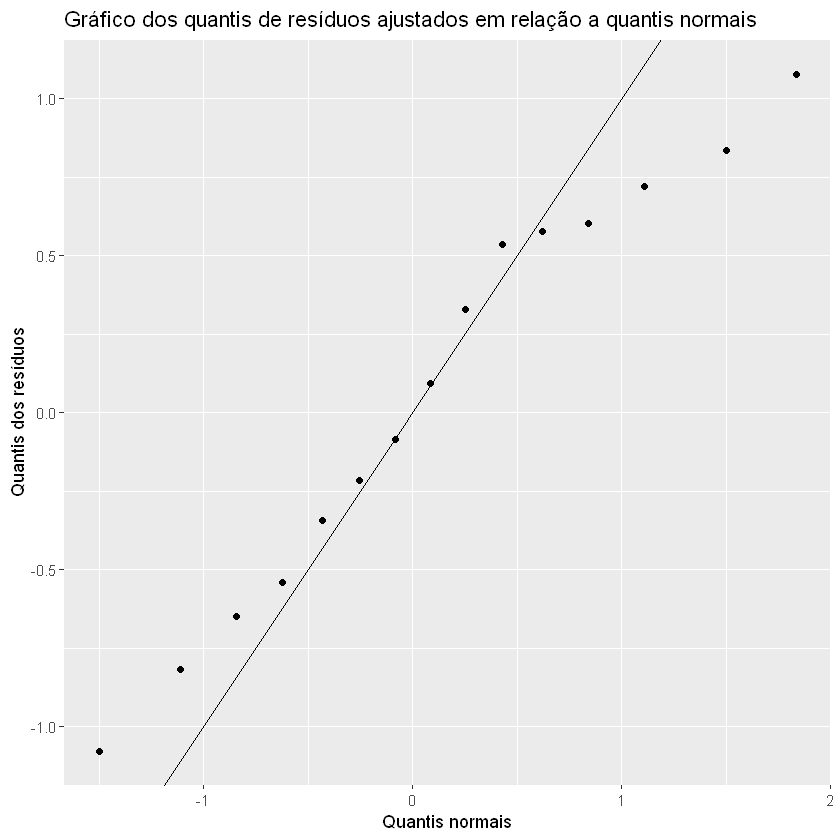

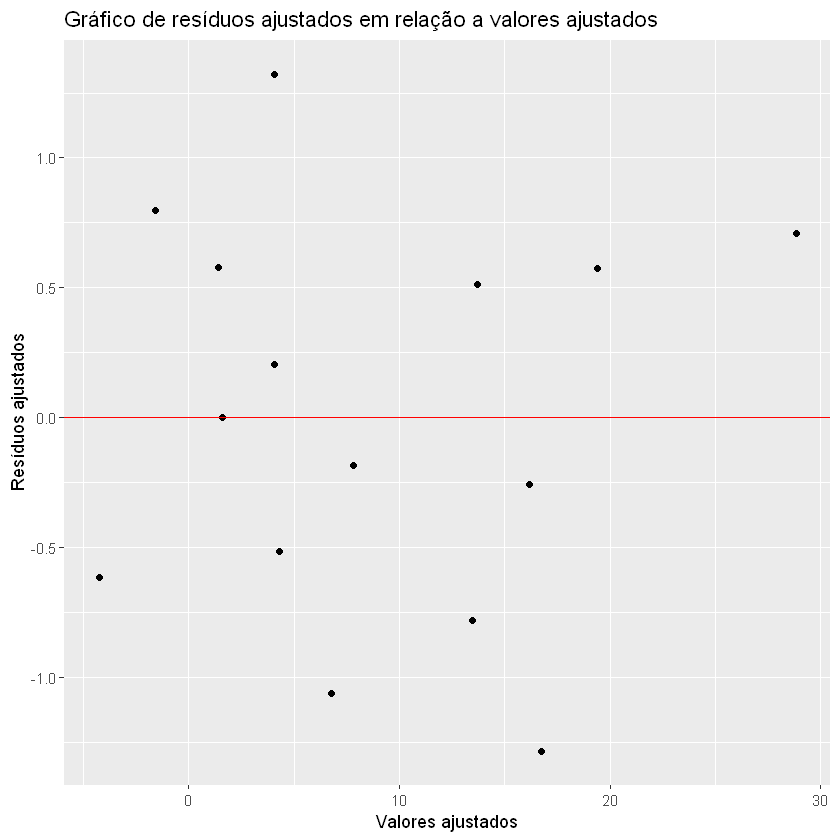

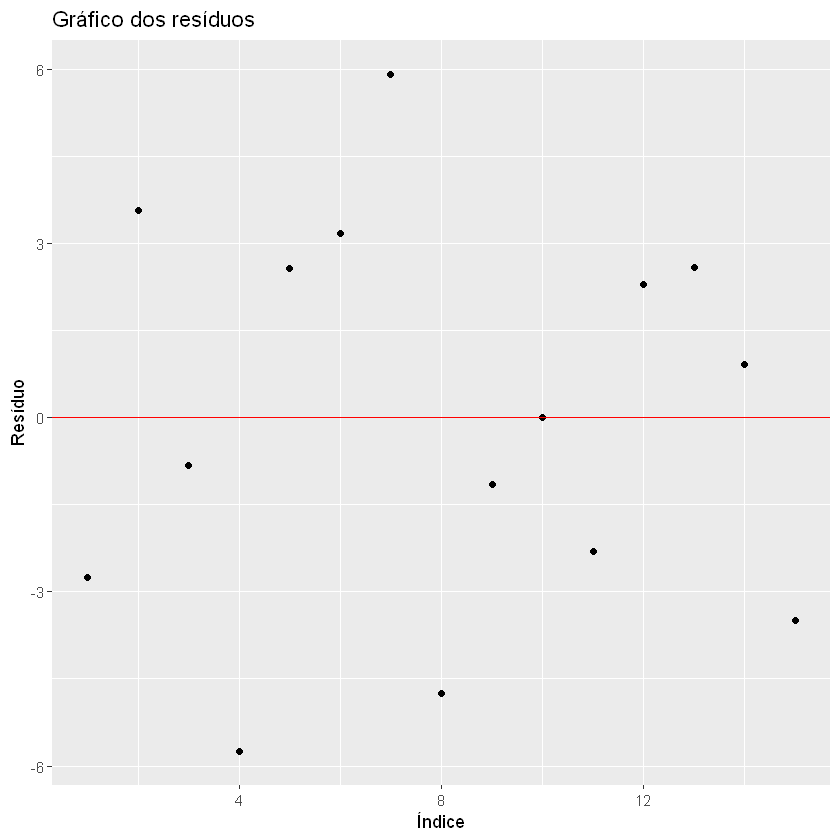

In [40]:
# Criando funcao para gerar grafico QQ
graficoQQ = function ( modelo , valoresInf , valoresSup ) { 
    
    residuosAjust = modelo$residuals / sigma ( modelo )
    numObs = length ( residuosAjust )
    quantisRes = quantile ( residuosAjust , c ( ( 1 : ( numObs - 1) )/numObs , ( numObs - 0.5 ) / numObs ) )
    quantisNorm = qnorm ( c ( ( 1 : ( numObs - 1) )/numObs , ( numObs - 0.5 ) / numObs ) )

    dfQQ = as.data.frame ( cbind ( quantisRes , quantisNorm , valoresInf , valoresSup ) )
    
    print (
    dfQQ %>% ggplot ( ) + 
    geom_point ( aes ( x = quantisNorm , y = quantisRes ) ) +
#     geom_line ( aes ( x = quantisNorm , y = valoresInf ) , col = 'red' ) +
#     geom_line ( aes ( x = quantisNorm , y = valoresSup ) , col = 'red' ) +
    geom_abline ( intercept = 0 , slope = 1 ) +
    ggtitle ( "Gráfico dos quantis de resíduos ajustados em relação a quantis normais" ) +
    labs ( x = "Quantis normais" , y = "Quantis dos resíduos" )
    )
    
}
# Homocedasticidade
graficoHomo = function ( modelo ) {

    dfHomocedast = as.data.frame ( cbind ( modelo$residuals / sigma ( modelo ) , modelo$fitted.values ) )
    names ( dfHomocedast ) = c ( "Residuo" , "Ajuste" )
    
    print ( 
        
    dfHomocedast  %>% ggplot (  ) + 
    geom_point ( aes ( x = Ajuste , y = Residuo ) ) + 
    geom_hline ( yintercept = 0 , col = "red" ) + 
    ggtitle ( "Gráfico de resíduos ajustados em relação a valores ajustados" ) +
    labs ( x = "Valores ajustados" , y = "Resíduos ajustados" )
        
    )
    
}

# Residuos
graficoResiduos = function ( modelo ) {

    residuosDf = as.data.frame ( modelo$residuals )
    colnames ( residuosDf ) = c ( "residuo" )
    residuosDf$indice = row ( residuosDf )
    
    print (
        
        residuosDf %>% ggplot (  ) + 
        geom_point ( aes ( x = indice , y = residuo ) ) +
        geom_hline ( yintercept = 0 , col = "red" ) +
        ggtitle ( "Gráfico dos resíduos" ) +
        labs ( x = "Índice" , y = "Resíduo" )
        
    )
    
}

# plota tudo
plotaGeral = function ( modelo , valoresInf , valoresSup ){
    
    graficoQQ ( modelo , valoresInf , valoresSup )
    graficoHomo ( modelo )
    graficoResiduos ( modelo )
    
}

plotaGeral ( lm ( Delta ~ Trat + Planta , data = df3 ) , NULL , NULL )

In [41]:
print ( bartlett.test ( anova3$residuals ~ df3[ , "Trat" ]  ) )
print ( snpar::runs.test( anova3$residuals ) )
print ( shapiro.test ( anova3$residuals ) )


	Bartlett test of homogeneity of variances

data:  anova3$residuals by df3[, "Trat"]
Bartlett's K-squared = 0.93019, df = 2, p-value = 0.6281


	Approximate runs rest

data:  anova3$residuals
Runs = 7, p-value = 0.4297
alternative hypothesis: two.sided


	Shapiro-Wilk normality test

data:  anova3$residuals
W = 0.97125, p-value = 0.8761



Levando-se em consideração que existem poucas observações no experimento, não se percebe grandes desvios das premissas.

b) Compare as fontes de variação presentes no experimento.

In [42]:
bartlett.test ( anova3$residuals ~ df3[ , "Planta" ]  )


	Bartlett test of homogeneity of variances

data:  anova3$residuals by df3[, "Planta"]
Bartlett's K-squared = 1.6015, df = 4, p-value = 0.8085


Não há evidências para se rejeitar a hipótese de que exista diferença entre as fontes de variação.

c) Suspeitando que a hipótese de normalidade não é apropriada a estes dados, construa um Teste de Aleatorização para o efeito global dos tratamentos.

Uma possibilidade de teste seria criar um algoritmo para, fixados os valores observados, permutar-se os grupos aos quais os mesmos foram observados e a cada iteração, realizar o cálculo da estatística F (desta forma, teremos uma distribuição de comparações entre grupos). Assim, se o valor F que calcularmos for extremo nesta distribuição, teremos indícios de que o "grupo" aos quais as observações pertencem têm algum tipo de associação com a resposta.

In [43]:
nSim = 10^3
valF = c ( )

set.seed(123)
for ( i in 1:nSim ){
    
    trat = sample ( df3$Trat , nrow ( df3 ) , replace = F )
    resp = df3$Delta
    tabela = anova ( aov ( resp ~ trat ) )
    valF = c ( valF , tabela$`F value`[1] )
    
}

dfValf = valF %>% as.data.frame ()
colnames ( dfValf ) = c ( "fAleat" )
dfValf %>% head ( 5 )

,fAleat
,<dbl>
1,0.92999407
2,0.42369051
3,0.73068025
4,2.01862036
5,0.09634133


[1] "A estatística F dos dados originais é: 0.459"


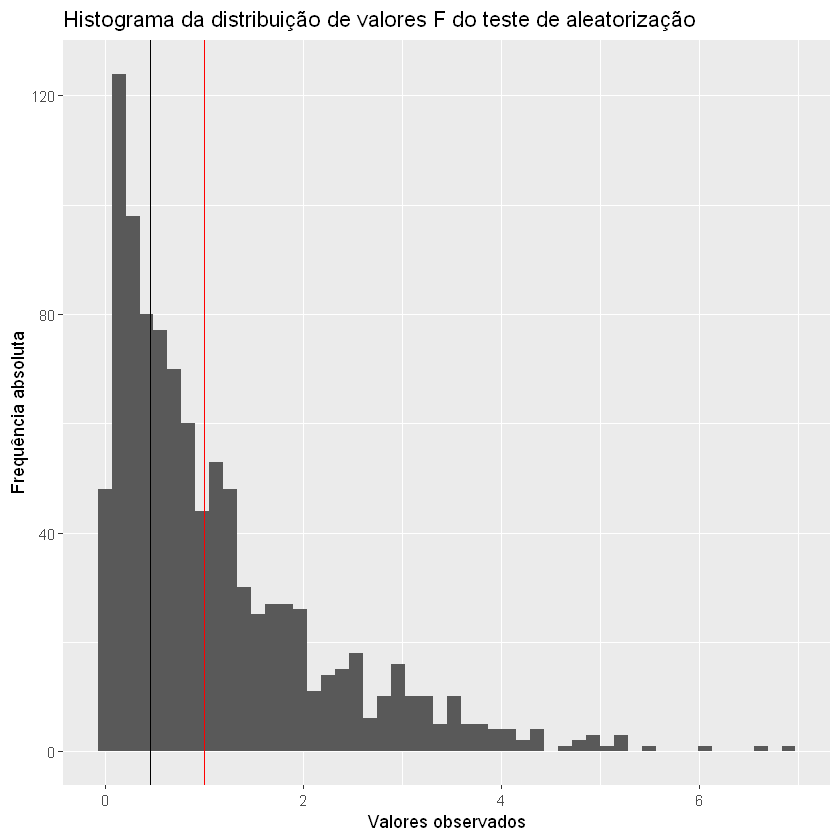

In [44]:
tabelaOrig = anova ( aov ( resp ~ trat ) )
valFOrig = tabelaOrig$`F value`[1]
print ( paste ( "A estatística F dos dados originais é:" , round ( valFOrig , 3 ) ) )

dfValf %>% ggplot ( aes ( x = fAleat ) ) +
geom_histogram ( bins = 50 ) +
geom_vline ( xintercept = valFOrig ) +
geom_vline ( xintercept = 1 , col = "red" ) +
labs ( x = "Valores observados" , y = "Frequência absoluta" , title = "Histograma da distribuição de valores F do teste de aleatorização" )

In [45]:
valP = 100 * ( sum ( dfValf$fAleat < valFOrig ) + sum ( dfValf$fAleat > 1/valFOrig ) ) / nrow ( dfValf )
print ( paste0 ( "Temos que o valor-p observado para o teste bicaudal é dado por: " , valP , "%" ) )

[1] "Temos que o valor-p observado para o teste bicaudal é dado por: 48.3%"


Considerando o teste de aleatorização realizado, temos que não há evidências para se rejeitar a hipótese de que os tratamentos são iguais (valor-p dado por 58,9%).